## Load dan Visualisasi Waveform Asli

#### pertama kita import library terlebih dahulu
#### kemudian lanjut load file suara, file suara nya saya dapatkan di platform freesound
#### dari ivoliYT file bernama bird song in forest, saya rename agar mempermudah memanggil nya
#### selanjutnya visualisasi waveform

Durasi: 87.26 detik | Sample rate: 48000


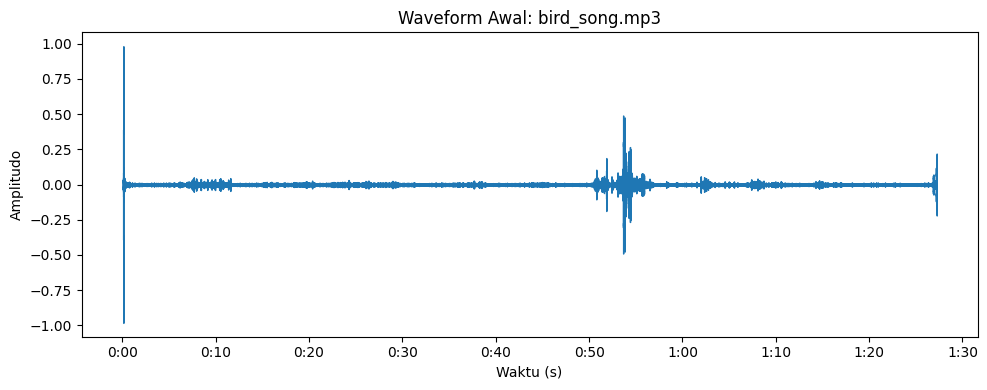

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf


# Load file suara
file_path = '/kaggle/input/experiment-bird-song/bird_song.mp3'
y, sr = librosa.load(file_path, sr=None)

print(f"Durasi: {len(y)/sr:.2f} detik | Sample rate: {sr}")

# Visualisasi waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform Awal: bird_song.mp3')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.tight_layout()
plt.show()

# Simpan ulang untuk referensi
sf.write('original.mp3', y, sr)


## Normalisasi Amplitudo

#### Kita membagi semua nilai amplitudo dengan nilai absolut maksimum.
#### Tujuannya agar semua nilai berada di rentang [-1, 1], supaya:
#### Lebih stabil saat diproses
#### Gak kepotong kalau disimpan ulang

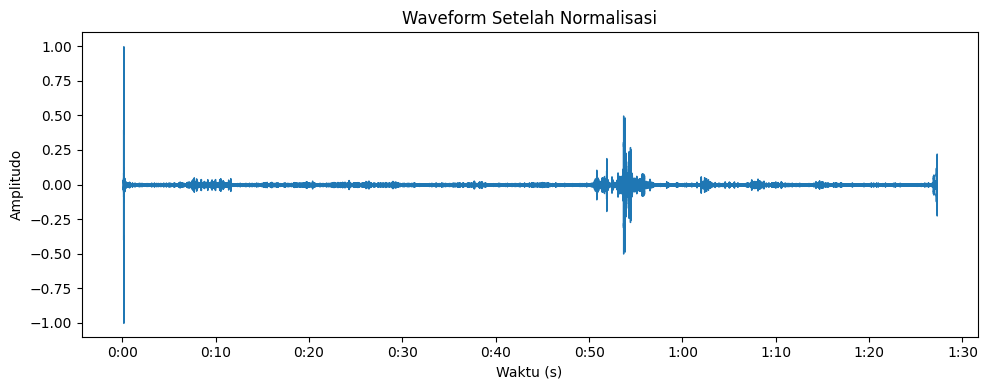

In [2]:
# Normalisasi amplitudo ke range [-1, 1]
y_norm = y / np.max(np.abs(y))

# Simpan hasil
sf.write('normalized.mp3', y_norm, sr)

# Visualisasi
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_norm, sr=sr)
plt.title('Waveform Setelah Normalisasi')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.tight_layout()
plt.show()

from IPython.display import Audio
Audio('normalized.mp3')

## Noise Reduction (Moving Average Filter)

#### membuat jendela rata-rata dan menggeser jendela dan menghitung rata-rata lokal untuk mengurangi noise (getaran kecil).

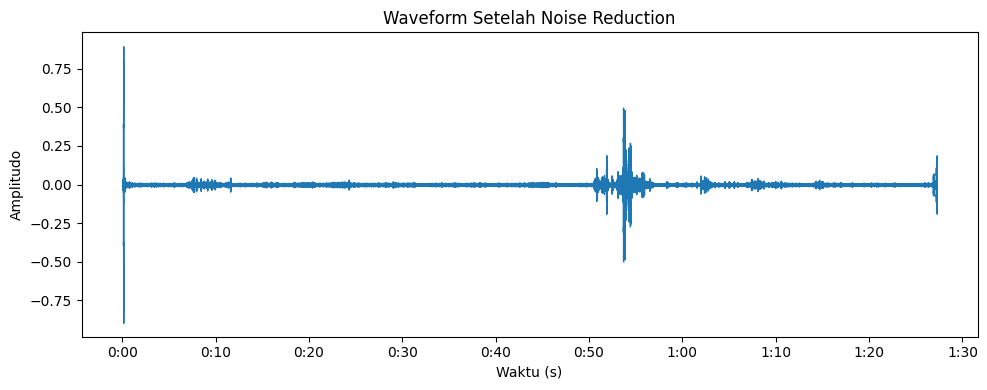

In [3]:
def moving_average(signal, window_size=5):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

# Terapkan noise reduction
y_denoised = moving_average(y_norm, window_size=10)

# Simpan hasil
sf.write('denoised.mp3', y_denoised, sr)

# Visualisasi
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_denoised, sr=sr)
plt.title('Waveform Setelah Noise Reduction')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.tight_layout()
plt.show()

Audio('denoised.mp3')

## Spektrum Frekuensi (Transformasi Fourier)

#### Short-Time Fourier Transform, memecah sinyal jadi potongan kecil lalu dihitung spektrumnya.
#### mengubah dari linear ke skala desibel (logaritmik) supaya spektrumnya lebih mudah dibaca manusia.
#### spektrogram — visualisasi 3 dimensi (waktu, frekuensi, intensitas), warna menunjukkan seberapa kuat frekuensi tertentu muncul di waktu tertentu.



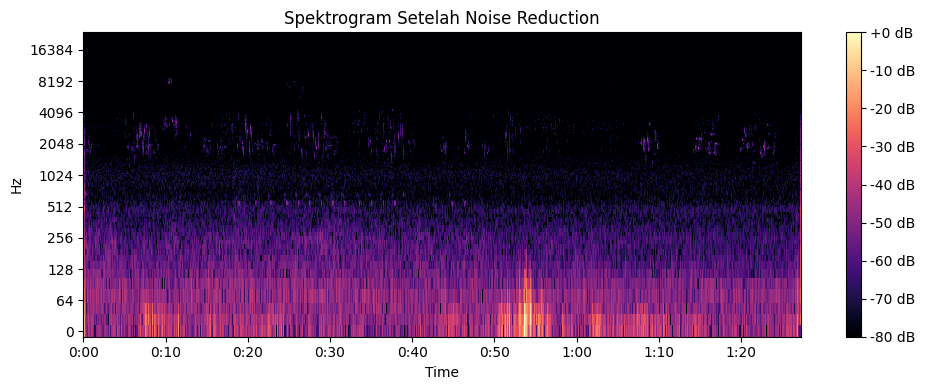

In [4]:
# Hitung STFT (Short-Time Fourier Transform)
D = np.abs(librosa.stft(y_denoised))

# Konversi ke skala dB
DB = librosa.amplitude_to_db(D, ref=np.max)

# Visualisasi spektrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram Setelah Noise Reduction')
plt.tight_layout()
plt.show()

## Pitch Shifting

#### Menaikkan nada/pitch suara sebanyak 5 semitone (setengah nada).
#### librosa melakukan ini tanpa mengubah durasi suara.
#### Suara burung jadi seperti lebih “nyaring” atau lebih tinggi.

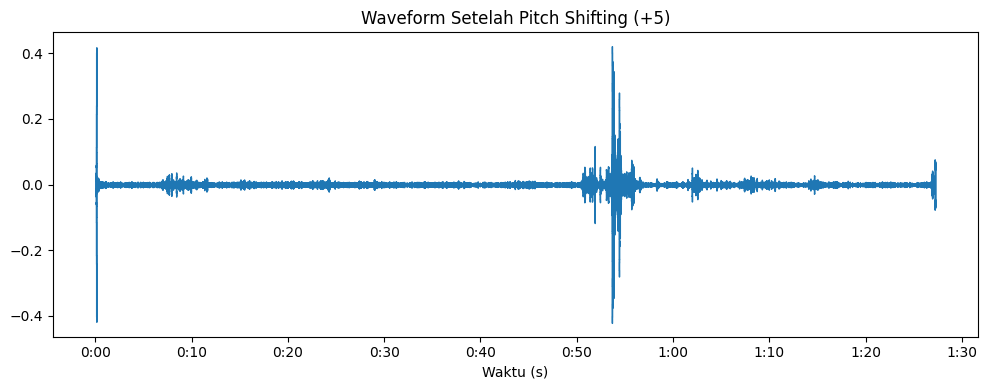

In [5]:
# Pitch shifting +5 semitone
y_pitch = librosa.effects.pitch_shift(y_denoised, sr=sr, n_steps=5)

# Simpan hasil
sf.write('pitch_up.mp3', y_pitch, sr)

# Visualisasi
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_pitch, sr=sr)
plt.title('Waveform Setelah Pitch Shifting (+5)')
plt.xlabel('Waktu (s)')
plt.tight_layout()
plt.show()

Audio('pitch_up.mp3')

## Time Stretching (Percepat)

#### Mempercepat suara sebanyak 1.5x dari kecepatan asli.
#### rate = 1.5 artinya durasi lebih pendek, tetapi pitch tetap (tidak cempreng).
#### Cocok kalau pingin bikin suara terdengar lebih cepat tanpa mengubah karakter suaranya.

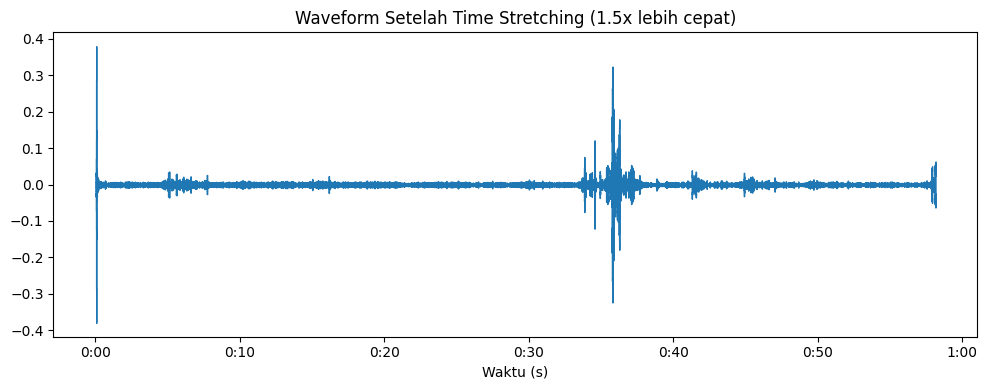

In [6]:
# Time stretching
y_fast = librosa.effects.time_stretch(y_denoised, rate=1.5)

# Simpan hasil
sf.write('faster.mp3', y_fast, sr)

# Visualisasi
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_fast, sr=sr)
plt.title('Waveform Setelah Time Stretching (1.5x lebih cepat)')
plt.xlabel('Waktu (s)')
plt.tight_layout()
plt.show()

Audio('faster.mp3')